# OrderExtend example with boat image 

###### This note shows how the OrderExtend algorithm performs the matrix completion task on a partially observed image data.

First, read boat image file and display.

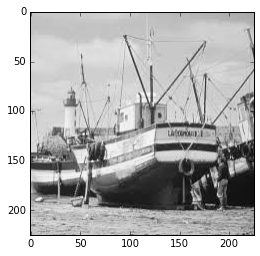

In [2]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from almc.order_extend import OrderExtend

img = ndimage.imread('../data/images/boat.jpeg', flatten=True)

img /= np.max(img) #normalize image [0,1]

plt.imshow(img, cmap = cm.Greys_r)

##### Prepare the model.

We assume 30% of matrix is observed, and set the rank to 50.

Initial model is running with 100 iterations.

2015-08-18 15:04:32 INFO:OrderExtend:Total budget used: 2888 / 50625
INFO:OrderExtend:Total budget used: 2888 / 50625
2015-08-18 15:04:32 INFO:OrderExtend:Final relative error: 0.967
INFO:OrderExtend:Final relative error: 0.967
2015-08-18 15:04:32 INFO:OrderExtend:Solved x-dim: 50 y-dim: 66
INFO:OrderExtend:Solved x-dim: 50 y-dim: 66


0.933609962463 0.0


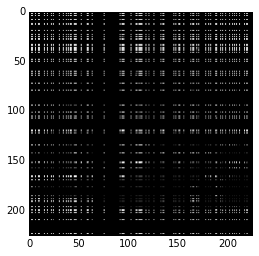

In [2]:
nx,ny = img.shape
r = 50
p = 0.3
max_iter = 100
theta = 1

# mask of the observed pixels (randomly chosen)
sigma = np.random.binomial(1, p, size=img.shape)

model = OrderExtend(img, sigma, r, theta=theta)
order = model.init()
r_img, x, y = model.fit(order, max_iter=max_iter)

plt.imshow(r_img, cmap = cm.Greys_r)
print(np.max(r_img),np.min(r_img))

Now we set the iteration number to 1000, and rerun the model.

2015-08-18 15:05:20 INFO:OrderExtend:Total budget used: 10143 / 50625
INFO:OrderExtend:Total budget used: 10143 / 50625
2015-08-18 15:05:20 INFO:OrderExtend:Final relative error: 0.884
INFO:OrderExtend:Final relative error: 0.884
2015-08-18 15:05:20 INFO:OrderExtend:Solved x-dim: 50 y-dim: 219
INFO:OrderExtend:Solved x-dim: 50 y-dim: 219


0.962655603886 0.0


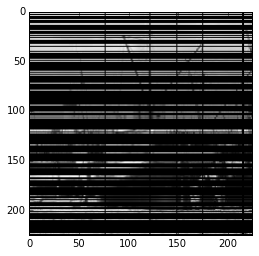

In [3]:
r_img, x, y = model.fit(order, max_iter=1000)
plt.imshow(r_img, cmap = cm.Greys_r)
print(np.max(r_img),np.min(r_img))

##### The model cannot solve any dimension of $x$-axis except the dimensions used in initialization, because the model decides that the any $r \times r$ submatrix of $y$ is highly unstable to solve following linear systems, even with the stabilize routine. In other words, the local condition number of initial matrix is greater than the threshold $\theta$. Now let's increase the threshold to 3.

2015-08-18 15:05:49 INFO:OrderExtend:Total budget used: 13172 / 50625
INFO:OrderExtend:Total budget used: 13172 / 50625
2015-08-18 15:05:49 INFO:OrderExtend:Final relative error: 0.973
INFO:OrderExtend:Final relative error: 0.973
2015-08-18 15:05:49 INFO:OrderExtend:Solved x-dim: 64 y-dim: 56
INFO:OrderExtend:Solved x-dim: 64 y-dim: 56


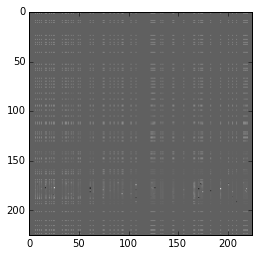

In [4]:
#set the threshold to 3
theta = 3

nx,ny = img.shape
r = 50
p = 0.3
max_iter = 5000

# mask of the observed pixels (randomly chosen)
sigma = np.random.binomial(1, p, size=img.shape)

# initialize another model with new theta
model = OrderExtend(img, sigma, r, theta)
order = model.init()
r_img, x, y = model.fit(order, max_iter=max_iter)

plt.imshow(r_img, cmap = cm.Greys_r)

In [5]:
print(np.max(r_img), np.min(r_img))

3.95851946122 -1.76209908172


#### After we set the threshold to 3, the system tries to solve unstable linear equations. Consequently, there is a great gap between the predicted and original matrix